# Image Classifier Using the Sequential API
Example from Hands-On ML

In [33]:
import tensorflow as tf
# from keras import backend as K
tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(2)

from tensorflow import keras
import numpy as np

In [2]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Load the Fashion MNIST dataset
* Every image is an array of 28x28 pixels
* Each pixel are integers from 0 to 155

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Now we create a validation and training sets, and normalizing it for Gradient Descent

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
class_names[y_train[0]]

'Coat'

## Use the sequential model to build the NN

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),   # Reshapes input, could use InputLayer
    keras.layers.Dense(300, activation="relu"),   # Hidden layer with 300 neurons
    keras.layers.Dense(100, activation="relu"),   # Hideden layer with 100 neurons
    keras.layers.Dense(10, activation="softmax"), # Output Layer with softmax since classes are exclusive
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.7140 - accuracy: 0.7637 - val_loss: 0.5050 - val_accuracy: 0.8272
Epoch 2/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4880 - accuracy: 0.8295 - val_loss: 0.4341 - val_accuracy: 0.8542
Epoch 3/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4435 - accuracy: 0.8444 - val_loss: 0.4232 - val_accuracy: 0.8554
Epoch 4/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4173 - accuracy: 0.8536 - val_loss: 0.3891 - val_accuracy: 0.8676
Epoch 5/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3964 - accuracy: 0.8607 - val_loss: 0.4034 - val_accuracy: 0.8580
Epoch 6/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3819 - accuracy: 0.8652 - val_loss: 0.3664 - val_accuracy: 0.8708
Epoch 7/30
55000/55000 [===========================

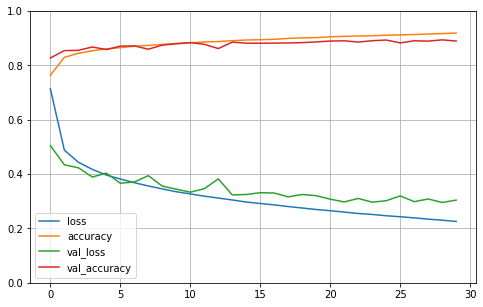

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[68.25297087554932, 0.8415]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [34]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [35]:
print(y_test[:3])

[9 2 1]
